# <a id='toc1_'></a>[Model evaluation](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [Model evaluation](#toc1_)    
  - [Regression metrics](#toc1_1_)    
    - [Mean Squared Error](#toc1_1_1_)    
    - [Mean Absolute Error](#toc1_1_2_)    
    - [Mean Absolute Percentage Error (MAPE)](#toc1_1_3_)    
    - [R2 score](#toc1_1_4_)    
  - [Classification metrics](#toc1_2_)    
    - [Accuracy score](#toc1_2_1_)    
    - [Confusion matrix](#toc1_2_2_)    
    - [Precision / Positive Predictive Value](#toc1_2_3_)    
    - [Recall / Sensitivity](#toc1_2_4_)    
    - [F1 score, F-beta score](#toc1_2_5_)    
    - [ROC AUC score](#toc1_2_6_)    
    - [PR AUC score](#toc1_2_7_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [74]:
from sklearn.datasets import  fetch_california_housing, load_breast_cancer
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, root_mean_squared_error
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, average_precision_score, f1_score, fbeta_score
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, RocCurveDisplay, PrecisionRecallDisplay

## <a id='toc1_1_'></a>[Regression metrics](#toc0_)

- **RMSE (Root Mean Squared Error)**: Penalizes large errors, good for when large deviations are particularly bad (e.g., stock price prediction).
- **MAE (Mean Absolute Error)**: More interpretable, but doesn’t penalize large errors as much.
- **MAPE (Mean Absolute Percentage Error)**: Useful when errors should be interpreted relative to the magnitude of predictions.
- **R² Score**: Measures how well the model explains variance in the data.

In [60]:
california = fetch_california_housing()
print(california["DESCR"])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [61]:
df_cali = pd.DataFrame(california["data"], columns = california["feature_names"])
df_cali["median_house_value"] = california["target"]

df_cali.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [62]:
features = df_cali.drop(columns = ["median_house_value","AveOccup", "Population", "AveBedrms"])
target = df_cali["median_house_value"]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

In [64]:
## Training a Model
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

### <a id='toc1_1_4_'></a>[R2 score](#toc0_)

R2 indicates how well the model explains variance in the data.

In [65]:
# Advantage: There are general rules on this
# IdealL 90%, 95% if you're lucky
# 98% -> ask questions
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2:.4f}")

R2 Score: 0.8163


## What happens if my target is in the training data?

In [68]:
X_train, X_test, y_train, y_test = train_test_split(df_cali, target, test_size = 0.20, random_state=0)

In [69]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value
12069,4.2386,6.0,7.723077,1.169231,228.0,3.507692,33.83,-117.55,5.00001
15925,4.3898,52.0,5.326622,1.100671,1485.0,3.322148,37.73,-122.44,2.70000
11162,3.9333,26.0,4.668478,1.046196,1022.0,2.777174,33.83,-118.00,1.96100
4904,1.4653,38.0,3.383495,1.009709,749.0,3.635922,34.01,-118.26,1.18800
4683,3.1765,52.0,4.119792,1.043403,1135.0,1.970486,34.08,-118.36,2.25000


In [70]:
## Training a Model
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [71]:
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2:.4f}")

R2 Score: 1.0000


## What happens if I scale my full dataset?

In [73]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [75]:
scaler_full_data = MinMaxScaler()
scaler_full_data.fit(features)

X_train_norm = scaler_full_data.transform(X_train)
X_test_norm = scaler_full_data.transform(X_test)

knn_full_data = KNeighborsRegressor(n_neighbors=5)
knn_full_data.fit(X_train_norm, y_train)
knn_full_data.score(X_test_norm, y_test)

0.6977612773015094

In [76]:
scaler_train_data = MinMaxScaler()
scaler_train_data.fit(X_train)

X_train_norm = scaler_train_data.transform(X_train)
X_test_norm = scaler_train_data.transform(X_test)

knn_full_data = KNeighborsRegressor(n_neighbors=5)
knn_full_data.fit(X_train_norm, y_train)
knn_full_data.score(X_test_norm, y_test)

0.6977612773015094

In [77]:
features.sort_values(by='MedInc')

,MedInc,HouseAge,AveRooms,Latitude,Longitude
4861,0.4999,29.0,2.373272,34.02,-118.28
7125,0.4999,36.0,2.500000,33.90,-118.04
6688,0.4999,28.0,7.677419,34.15,-118.08
19800,0.4999,15.0,11.596491,40.43,-123.32
6343,0.4999,52.0,3.875000,34.06,-117.75
...,...,...,...,...,...
4605,15.0001,52.0,8.483019,34.07,-118.33
4606,15.0001,52.0,9.204969,34.07,-118.33
4626,15.0001,52.0,7.958333,34.06,-118.32
8848,15.0001,52.0,8.907583,34.08,-118.39


In [82]:
X_train

,MedInc,HouseAge,AveRooms,Latitude,Longitude
0,8.3252,41.0,6.984127,37.88,-122.23
1,8.3014,21.0,6.238137,37.86,-122.22
2,7.2574,52.0,8.288136,37.85,-122.24
3,5.6431,52.0,5.817352,37.85,-122.25
4,3.8462,52.0,6.281853,37.85,-122.25
...,...,...,...,...,...
20632,3.1250,15.0,6.023377,39.26,-121.45
20633,2.5495,27.0,5.445026,39.19,-121.53
20634,3.7125,28.0,6.779070,39.27,-121.56
20636,2.5568,18.0,6.114035,39.49,-121.21


In [85]:
target.index.isin(X_train)

array([False, False, False, ..., False, False, False])

In [88]:
X_train = features[features.MedInc.between(2, 12)]
y_train = target.loc[X_train.index]

X_test = features[features.index.isin(X_train.index) == False]
y_test = target.loc[X_test.index]

In [89]:
scaler_full_data = MinMaxScaler()
scaler_full_data.fit(features)

X_train_norm = scaler_full_data.transform(X_train)
X_test_norm = scaler_full_data.transform(X_test)

knn_full_data = KNeighborsRegressor(n_neighbors=5)
knn_full_data.fit(X_train_norm, y_train)
knn_full_data.score(X_test_norm, y_test)

0.7019601883661906

In [90]:
scaler_train_data = MinMaxScaler()
scaler_train_data.fit(X_train)

X_train_norm = scaler_train_data.transform(X_train)
X_test_norm = scaler_train_data.transform(X_test)

knn_full_data = KNeighborsRegressor(n_neighbors=5)
knn_full_data.fit(X_train_norm, y_train)
knn_full_data.score(X_test_norm, y_test)

0.6926433616290983

In [ ]:
X_train = features[features.MedInc.between(2, 12)]
y_train = target[target.index.isin(X_train)]

X_test = features[features.index.isin(X_train.index) == False]
y_test = target[target.index.isin(X_test)]

In [ ]:
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2:.4f}")

### <a id='toc1_1_1_'></a>[(Root) Mean Squared Error](#toc0_)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

In [95]:
## Training a Model
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

KeyboardInterrupt: 

MSE is useful when large errors are particularly undesirable, as it penalizes larger errors more.

In [98]:
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.4f} $^2")

MSE: 0.2396 $^2


In [99]:
rmse = root_mean_squared_error(y_test, y_pred)
print(f"RMSE: {rmse:.4f} $")

RMSE: 0.4895 $


### <a id='toc1_1_2_'></a>[Mean Absolute Error](#toc0_)

MAE provides a more interpretable error metric and does not penalize large errors as much as MSE.

In [100]:
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.4f}")

MAE: 0.3231


### <a id='toc1_1_3_'></a>[Mean Absolute Percentage Error (MAPE)](#toc0_)

MAPE is useful when errors need to be evaluated in relative percentage terms.

In [101]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape:.4f}")

MAPE: 0.1833


## <a id='toc1_2_'></a>[Classification metrics](#toc0_)

- **Accuracy**: Good for balanced datasets but misleading for imbalanced ones.
- **Precision**: Focus when false positives are costly (e.g., spam detection).
- **Recall (Sensitivity)**: Important when false negatives are costly (e.g., cancer diagnosis).
- **F1 Score**: Balances precision and recall.
- **F-beta Score**: Balances precision and recall based on a given weight (beta), e.g. precision is 20% important and recall is 80% important.
- **ROC-AUC**: Useful for assessing overall model performance across different thresholds.
- **PR-AUC**: Useful for assessing overall model performance across different thresholds when the data is imbalanced.

In [102]:
cancer = load_breast_cancer()

In [103]:
# Extract dataset into pandas
features = pd.DataFrame(cancer['data'], columns = cancer['feature_names']) # predictors, independent variables
labels = pd.Series(cancer['target'], name = 'labels') # targets, dependent variable

In [106]:
# Balanced data?
labels.value_counts()

labels
1    357
0    212
Name: count, dtype: int64

In [ ]:
# Display features & labels
display(features)
display(labels)

In [104]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=2, test_size=0.2)

In [109]:
## Training a Model
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

In [127]:
y_pred_05 = classifier.predict_proba(X_test)[:, 1] > 0.5 # probability threshold (KNN, SVM, NB don't calculate probabilities but LR, RF, DT, XGBoost they do calculate probabilities)
y_pred_06 = classifier.predict_proba(X_test)[:, 1] > 0.6 

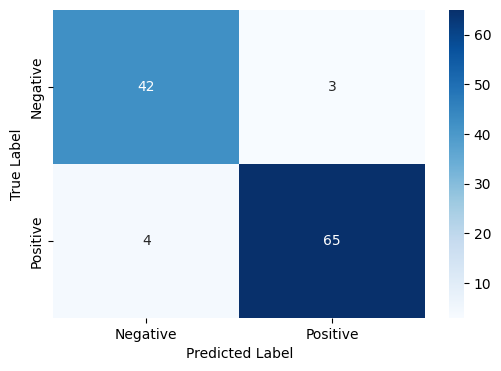

In [129]:
conf_matrix = confusion_matrix(y_test, y_pred_05)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

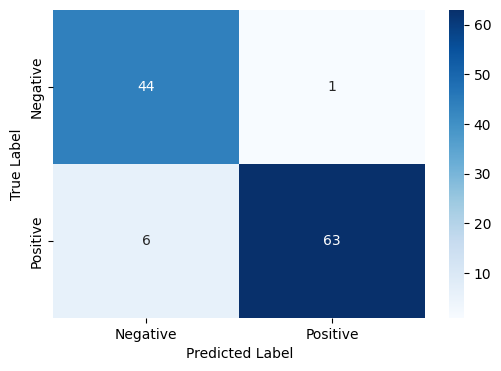

In [130]:
conf_matrix = confusion_matrix(y_test, y_pred_06)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
classifier.predict_proba(X_test)[:, 1] > 0.5

### <a id='toc1_2_1_'></a>[Accuracy score](#toc0_)

Accuracy is useful when the classes are balanced but can be misleading for imbalanced datasets.

In [110]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9386


In [118]:
pred_test = pd.concat([pd.DataFrame(y_pred), pd.DataFrame(y_test)], axis=1)
pred_test

,0,labels
0,1.0,NaN
1,1.0,0.0
2,1.0,NaN
3,0.0,0.0
4,1.0,NaN
...,...,...
539,NaN,1.0
314,NaN,1.0
471,NaN,1.0
449,NaN,0.0


In [111]:
true_positives = ((y_pred == 1) & (y_test == 1)).sum()
print(f"True Positives: {true_positives}")
print(f"Accuracy (positive class): {true_positives / len(y_test)}")

True Positives: 65
Accuracy (positive class): 0.5701754385964912


In [113]:
true_negatives = ((y_pred == 0) & (y_test == 0)).sum()
print(f"True negatives: {true_negatives}")
print(f"Accuracy (negative class): {true_negatives / len(y_test)}")

True negatives: 42
Accuracy (positive class): 0.3684210526315789


### <a id='toc1_2_2_'></a>[Confusion matrix](#toc0_)

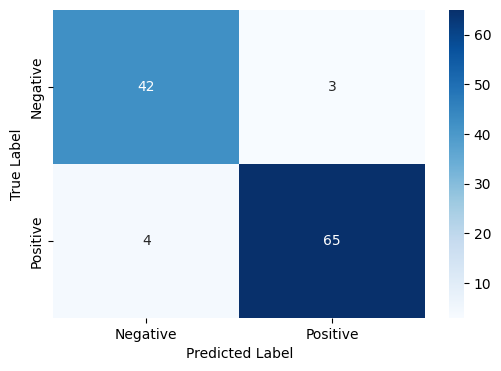

In [119]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### <a id='toc1_2_3_'></a>[Precision / Positive Predictive Value](#toc0_)

Precision is important in cases where false positives are costly, such as spam detection.

In [120]:
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

Precision: 0.9559


### <a id='toc1_2_4_'></a>[Recall / Sensitivity](#toc0_)

Recall is critical when false negatives are costly, such as in medical diagnoses.

In [121]:
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

Recall: 0.9420


### <a id='toc1_2_5_'></a>[F1 score, F-beta score](#toc0_)

F1 Score balances precision and recall, making it useful when both are important.

In [122]:
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")#

F1 Score: 0.9489


F-beta score is useful when you need to balance precision and recall but want to weigh one more than the other.

In [123]:
f_beta = fbeta_score(y_test, y_pred, beta=0.6)
print(f"F-beta Score: {f_beta:.4f}")#

F-beta Score: 0.9522


### <a id='toc1_2_6_'></a>[ROC AUC score](#toc0_)

ROC-AUC is useful for assessing overall model performance across different classification thresholds.

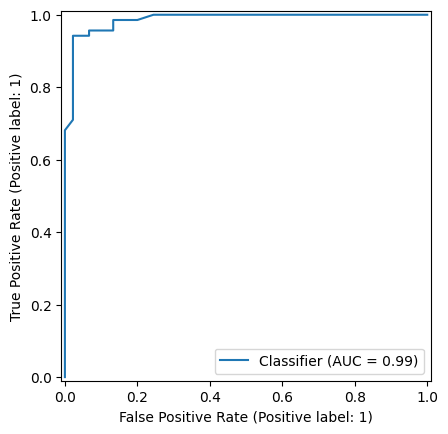

In [131]:
RocCurveDisplay.from_predictions(y_test, y_prob)

In [ ]:
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

### <a id='toc1_2_7_'></a>[PR AUC score](#toc0_)

PR-AUC is useful for assessing overall model performance across different classification thresholds for imbalanced data.

In [ ]:
pr_auc = average_precision_score(y_test, y_prob)
print(f"PR-AUC Score: {pr_auc:.4f}")

In [ ]:
PrecisionRecallDisplay.from_predictions(y_test, y_prob)